In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils.utils import get_dummy_labels, plot_age_distribution, plot_disease_distribution, stratified_train_test_split

In [2]:
dataset_dir = "../dataset/extracted/"

filepath = "../Data_entry_2017.csv"
data = pd.read_csv(filepath)

data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


## Statistical analysis

In [3]:
sns.set_theme(style="ticks")

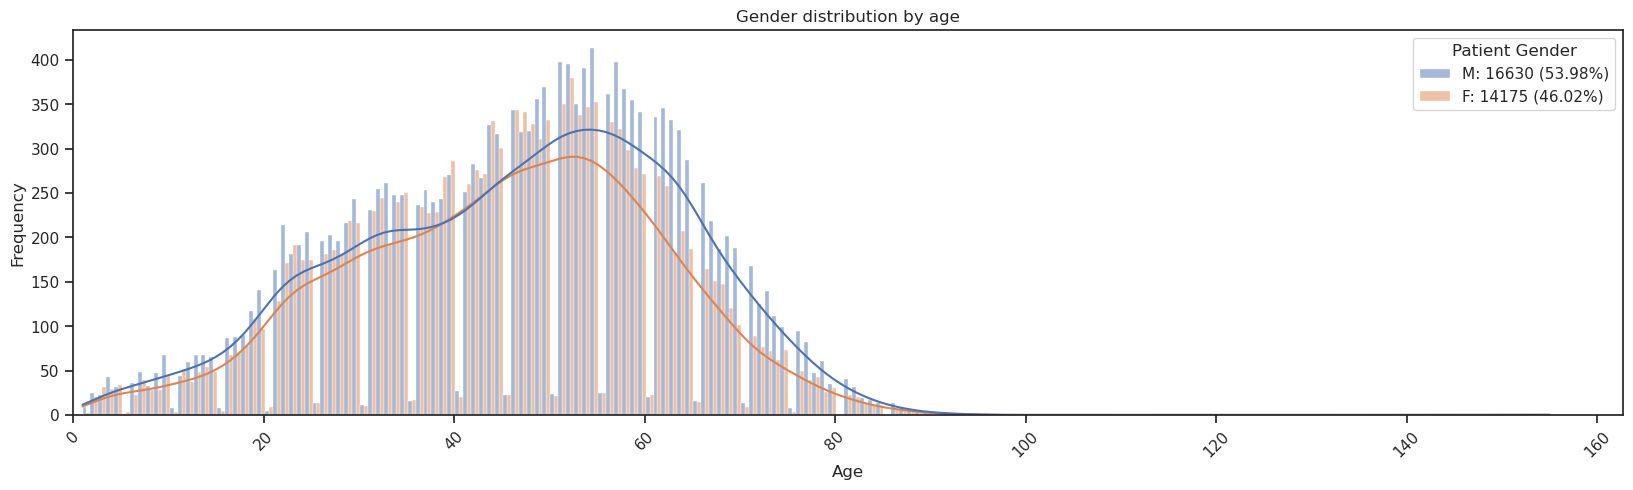

In [5]:
# No outliers removed
_ = plot_age_distribution(data)

In [6]:
data[["Patient Age"]].describe()

,Patient Age
count,112120.000000
mean,46.901463
std,16.839923
min,1.000000
25%,35.000000
50%,49.000000
75%,59.000000
max,414.000000


In [7]:
data[data["Patient Age"] > 100]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,0.143,NaN
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,0.143,NaN
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,0.143,NaN
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,0.143,NaN
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,0.143,NaN
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,0.143,NaN
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN


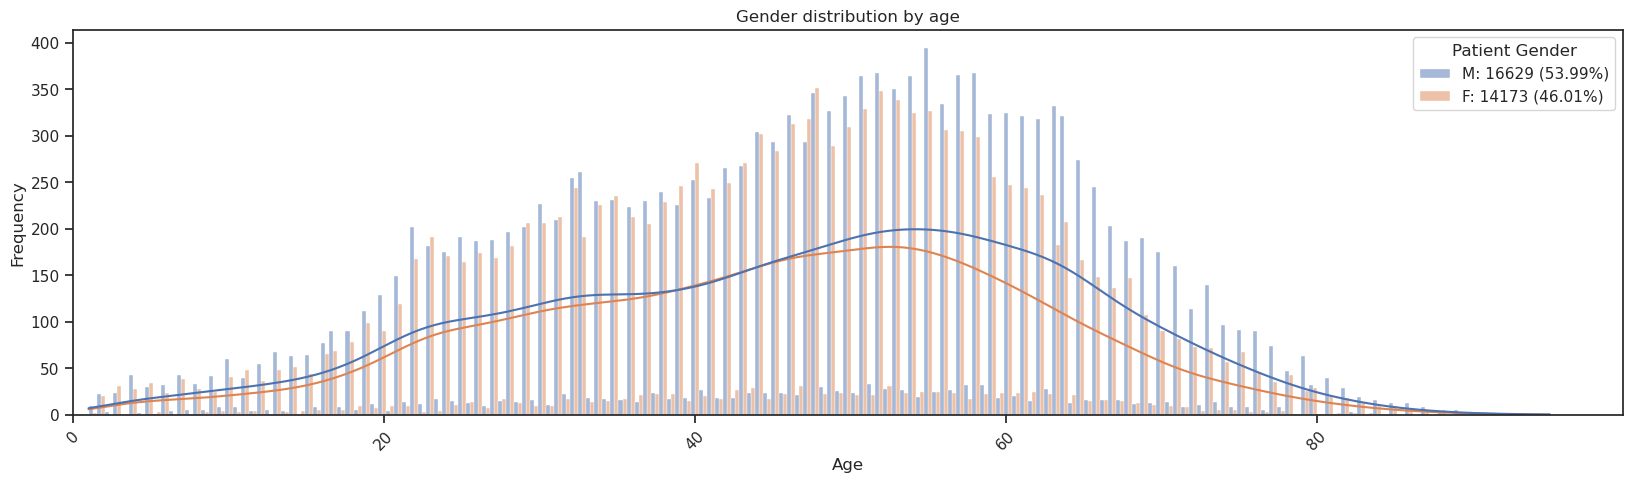

In [17]:
# Filter outliers
filtered_data = plot_age_distribution(data, filter_outliers=True, keep_single_label=False, dataset_dir=dataset_dir)

In [18]:
filtered_data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImagePixelSpacing[x,y],Path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,0.143,0.143,../dataset/extracted/images_001/images
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,0.143,0.143,../dataset/extracted/images_001/images
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,0.168,0.168,../dataset/extracted/images_001/images
3,00000002_000.png,No Finding,0,2,81,M,PA,0.171,0.171,../dataset/extracted/images_001/images
4,00000003_000.png,Hernia,0,3,81,F,PA,0.143,0.143,../dataset/extracted/images_001/images
...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,0.168,0.168,../dataset/extracted/images_012/images
112116,00030802_000.png,No Finding,0,30802,29,M,PA,0.168,0.168,../dataset/extracted/images_012/images
112117,00030803_000.png,No Finding,0,30803,42,F,PA,0.168,0.168,../dataset/extracted/images_012/images
112118,00030804_000.png,No Finding,0,30804,30,F,PA,0.168,0.168,../dataset/extracted/images_012/images


In [19]:
filtered_data = get_dummy_labels(filtered_data)
filtered_data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImagePixelSpacing[x,y],Path,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,0.143,0.143,../dataset/extracted/images_001/images,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,0.143,0.143,../dataset/extracted/images_001/images,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,0.168,0.168,../dataset/extracted/images_001/images,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,0.171,0.171,../dataset/extracted/images_001/images,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,0.143,0.143,../dataset/extracted/images_001/images,...,0,0,1,0,0,0,0,0,0,0


In [20]:
def remove_random_healthy_patients(df, ratio=0.5):
    _df = df.copy()
    healthy_patients = _df[_df["Finding Labels"] == "No Finding"]
    n_healthy_patients = len(healthy_patients)
    n_healthy_patients_to_remove = int(n_healthy_patients * ratio)
    healthy_patients_to_remove = healthy_patients.sample(n=n_healthy_patients_to_remove)
    print(f"Removing {n_healthy_patients_to_remove} healthy patients")
    return _df.drop(healthy_patients_to_remove.index)

filtered_data = remove_random_healthy_patients(filtered_data, ratio=0.3)
filtered_data.head()

Removing 18107 healthy patients


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImagePixelSpacing[x,y],Path,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,0.143,0.143,../dataset/extracted/images_001/images,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,0.143,0.143,../dataset/extracted/images_001/images,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,0.168,0.168,../dataset/extracted/images_001/images,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,0.171,0.171,../dataset/extracted/images_001/images,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,0.143,0.143,../dataset/extracted/images_001/images,...,0,0,1,0,0,0,0,0,0,0


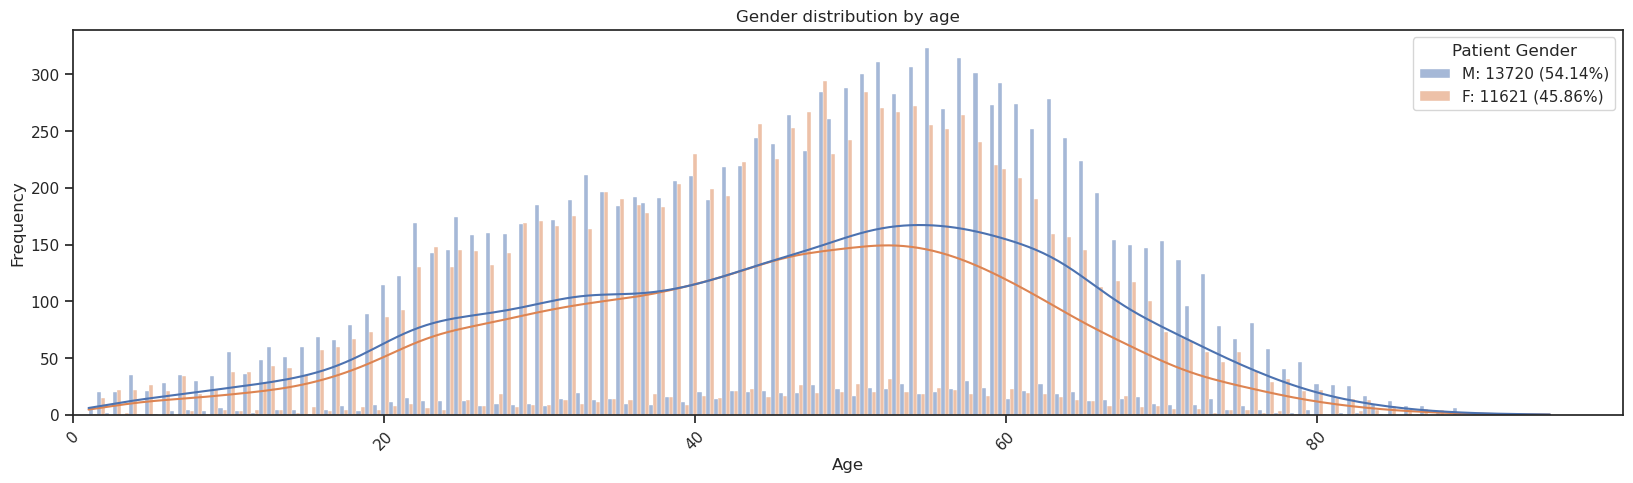

In [21]:
_ = plot_age_distribution(filtered_data, filter_outliers=True, keep_single_label=True, dataset_dir=dataset_dir)

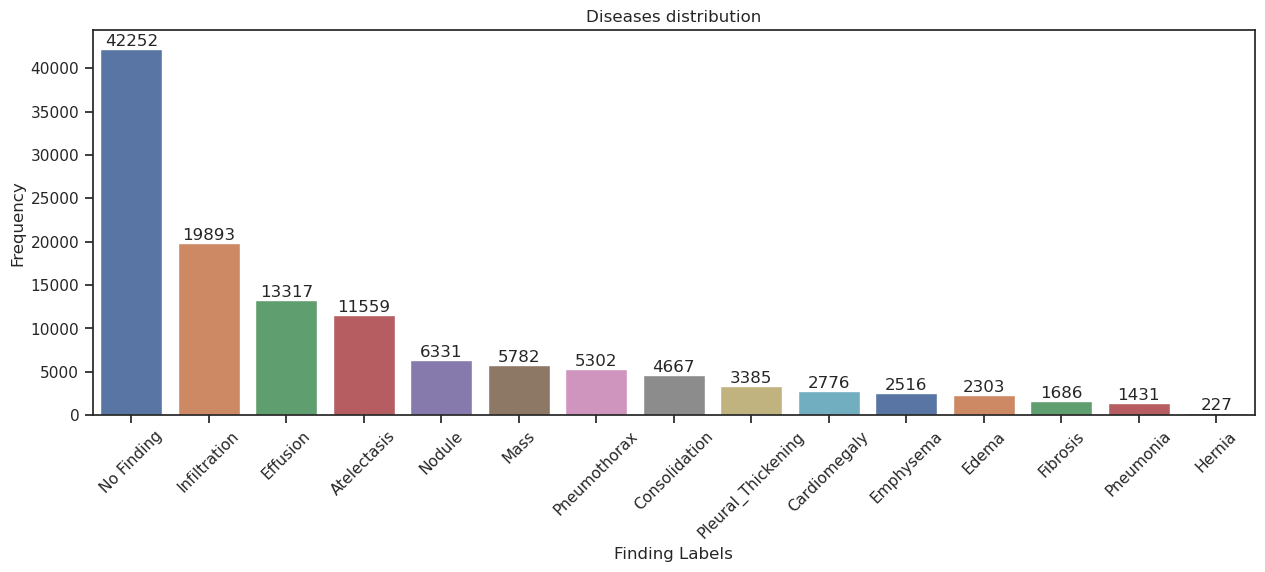

In [22]:
plot_disease_distribution(filtered_data)

In [23]:
filtered_data[["Patient Age"]].describe()

,Patient Age
count,94010.000000
mean,47.070780
std,16.605397
min,1.000000
25%,35.000000
50%,49.000000
75%,59.000000
max,95.000000


In [ ]:
# # Save filtered data
# filtered_data.to_csv("../Data_entry_2017_filtered_reduced.csv")

In [ ]:
# # Encode labels
# labels = filtered_data["Finding Labels"].str.split("|").explode().value_counts()
# label_map = {label: i for i, label in enumerate(labels.index)}

# # Save label map to csv
# label_map_df = pd.DataFrame(label_map.items(), columns=["Label", "Encoded"])
# label_map_df.to_csv("../dataset/splits/label_map.csv", index=False)

In [27]:
train_val_list = pd.read_csv("../dataset/splits/train_val_list.txt", header=None)
test_list = pd.read_csv("../dataset/splits/test_list.txt", header=None)

In [28]:
def get_patient_ids(image_list):
    return image_list[0].apply(lambda x: x.split("_")[0])

train_list_patients = get_patient_ids(train_val_list)
test_list_patients = get_patient_ids(test_list)

In [29]:
# Intersection between train_val_list and test_list
intersection = train_val_list.merge(test_list[0], how="inner")
intersection

,0


In [30]:
def get_set_df(df_data: pd.DataFrame, patients_list: pd.DataFrame) -> pd.DataFrame:
    return df_data[df_data["Image Index"].isin(patients_list[0])]

train_data = get_set_df(filtered_data, train_val_list)
test_data = get_set_df(filtered_data, test_list)

In [32]:
train_data, val_data = stratified_train_test_split(train_data)

/home/irina/miniconda3/envs/viz_tools/lib/python3.11/site-packages/sklearn/model_selection/_split.py:994: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


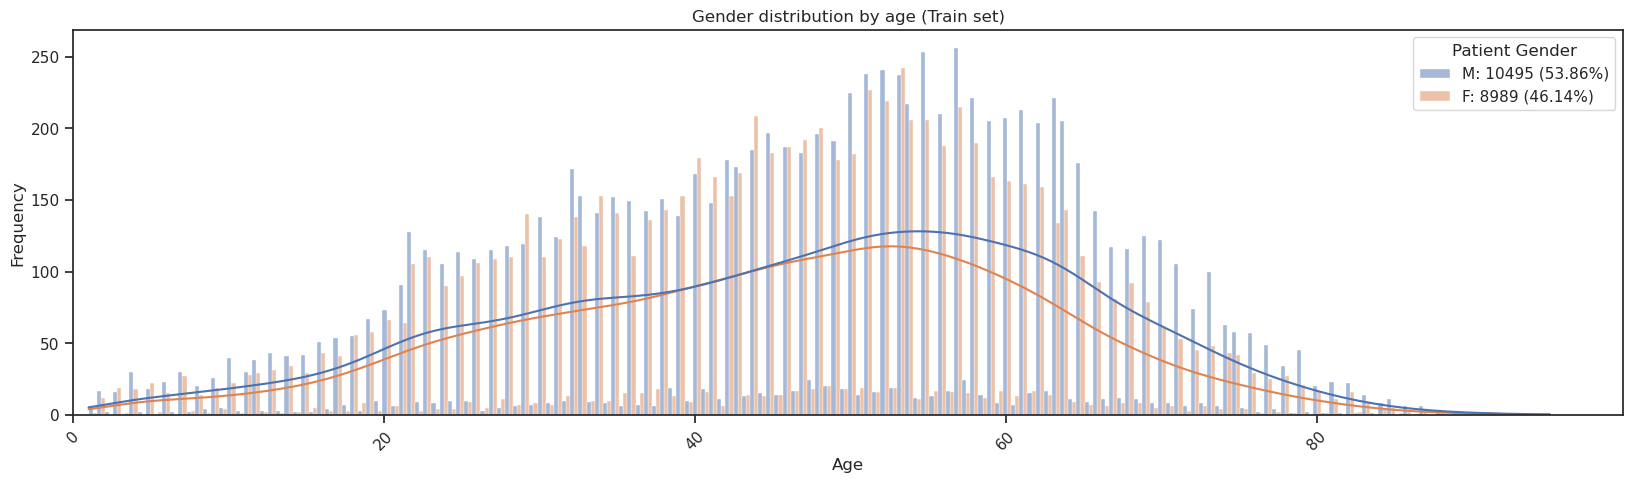

In [33]:
_ = plot_age_distribution(train_data, plot_title="Gender distribution by age (Train set)")

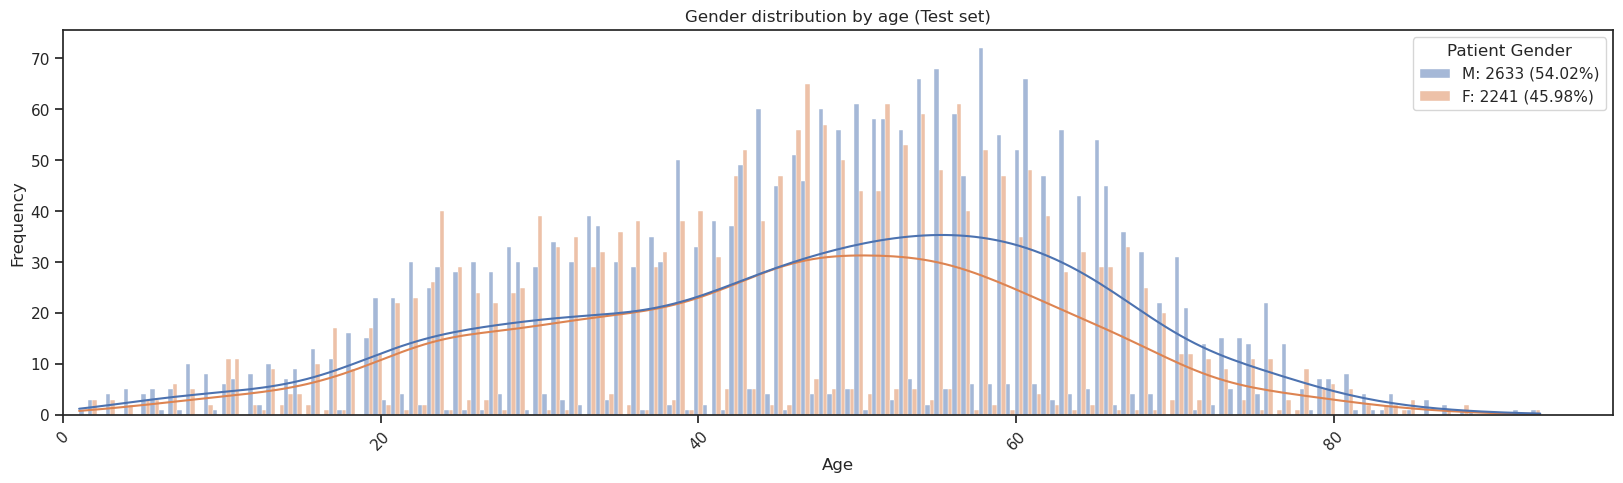

In [34]:
_ = plot_age_distribution(val_data, plot_title="Gender distribution by age (Test set)")

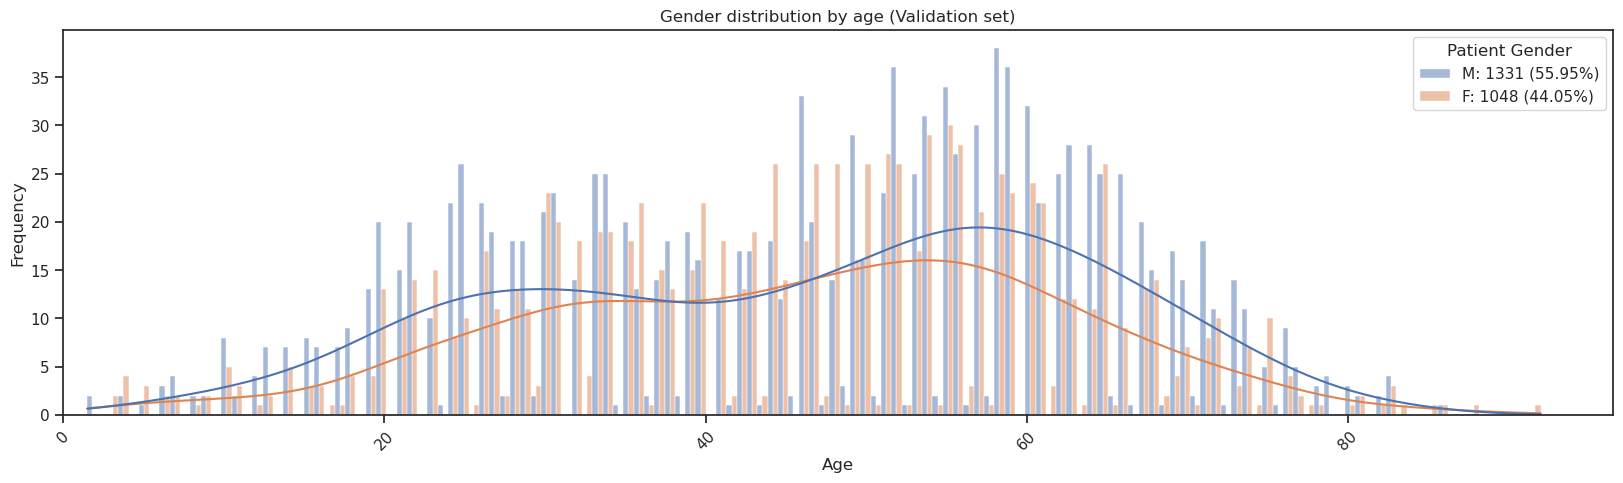

In [35]:
_ = plot_age_distribution(test_data, plot_title="Gender distribution by age (Validation set)")

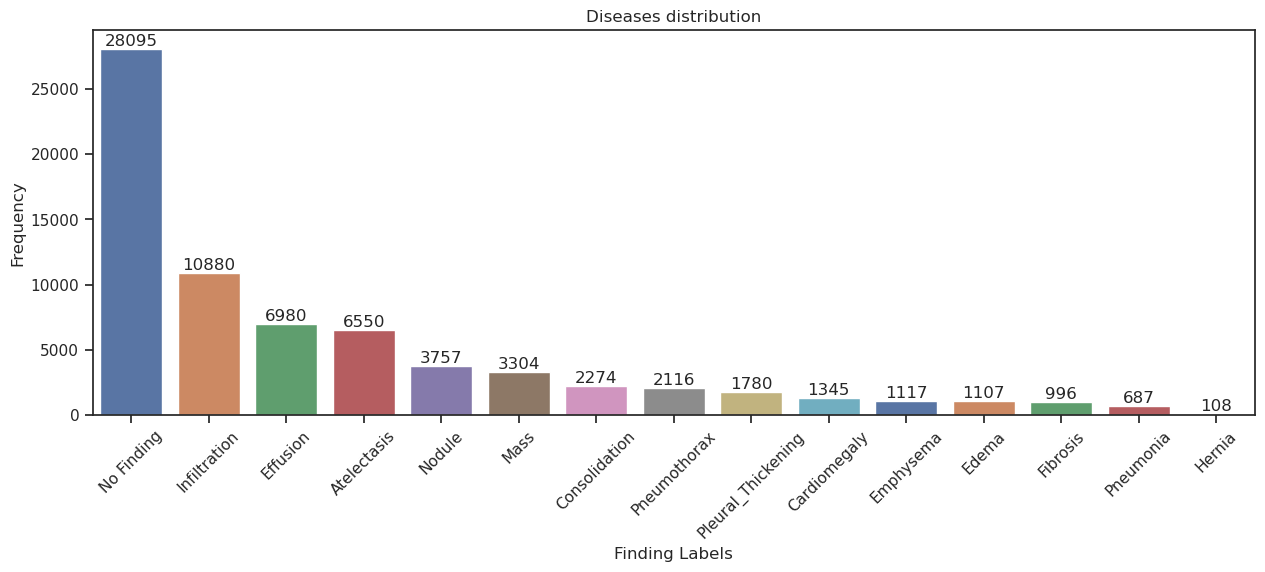

In [36]:
plot_disease_distribution(train_data)

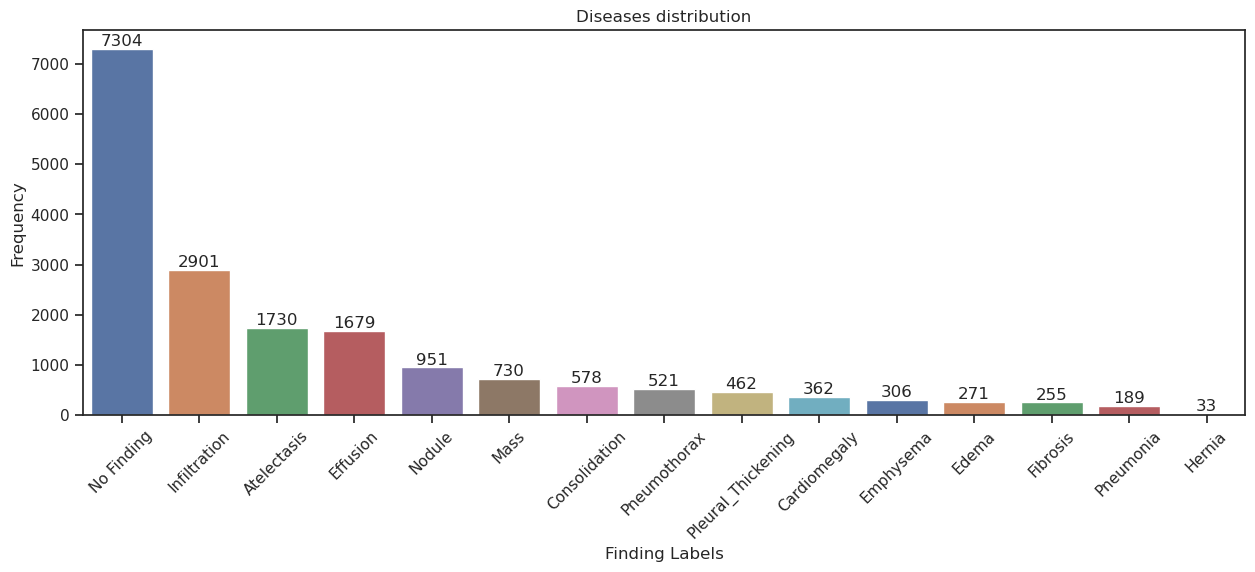

In [37]:
plot_disease_distribution(val_data)

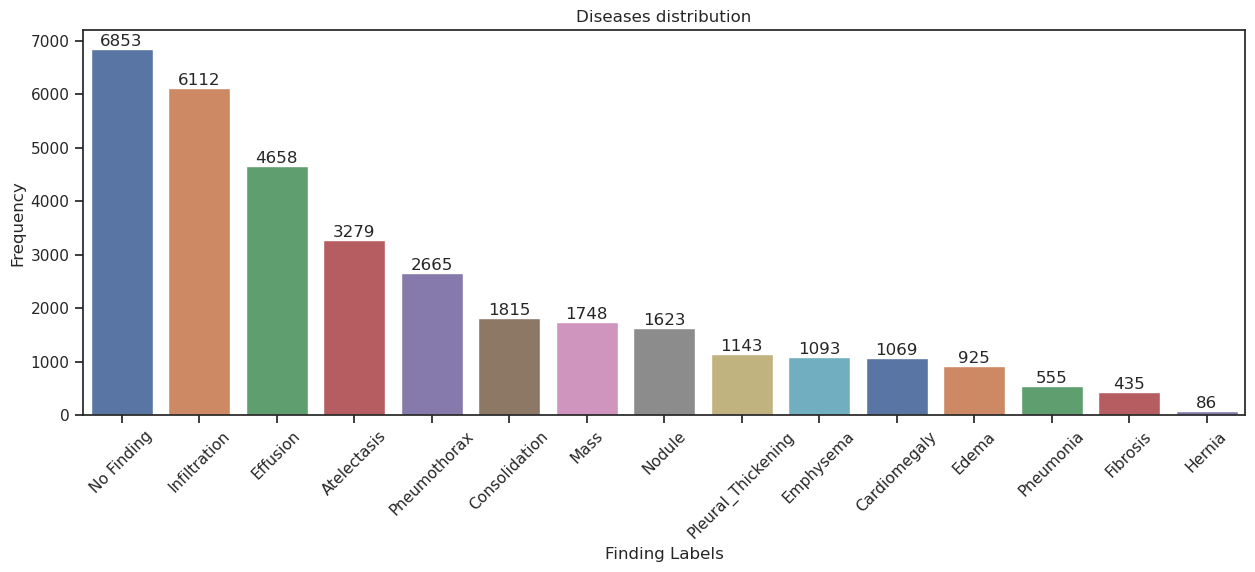

In [38]:
plot_disease_distribution(test_data)

In [ ]:
# # Save train and test data
# train_data.to_csv("../dataset/splits/data_entry_2017_train.csv")
# val_data.to_csv("../dataset/splits/data_entry_2017_val.csv")
# test_data.to_csv("../dataset/splits/data_entry_2017_test.csv")

In [43]:
filtered_data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImagePixelSpacing[x,y],Path,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,0.143,0.143,../dataset/extracted/images_001/images,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,0.143,0.143,../dataset/extracted/images_001/images,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,0.168,0.168,../dataset/extracted/images_001/images,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,0.171,0.171,../dataset/extracted/images_001/images,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,0.143,0.143,../dataset/extracted/images_001/images,...,0,0,1,0,0,0,0,0,0,0
